In [1]:
!nvidia-smi

Sun Apr 11 16:09:25 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.39       CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Graphics Device     Off  | 00000000:26:00.0  On |                  N/A |
|  0%   56C    P8    14W / 170W |    573MiB / 12050MiB |      7%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# !unzip ./data.zip

In [3]:
import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.InteractiveSession(config=config)
gpu = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpu[0], True)

# Become one with the data

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random,os

In [5]:
class_names = os.listdir('./book-covers')

./book-covers/History-Archaeology/0000568.jpg


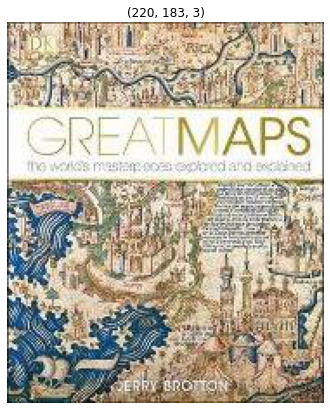

./book-covers/Graphic-Novels-Anime-Manga/0000949.jpg


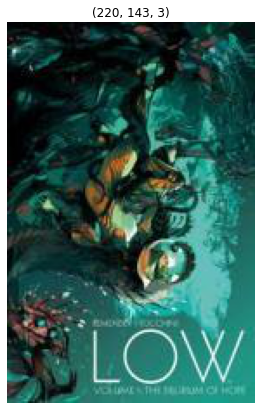

./book-covers/Childrens-Books/0000497.jpg


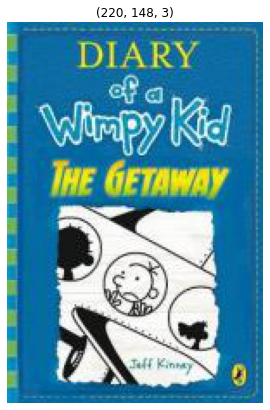

./book-covers/Natural-History/0000488.jpg


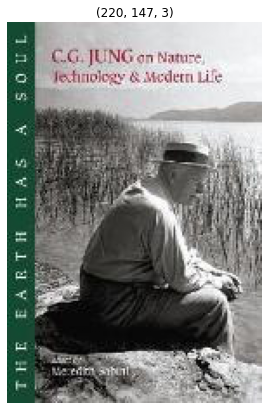

./book-covers/Computing/0000763.jpg


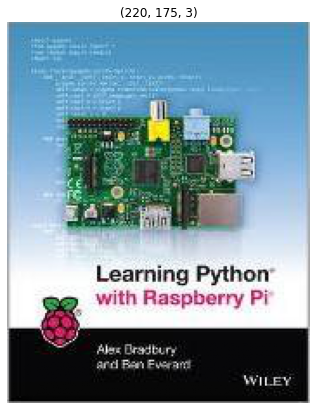

./book-covers/Home-Garden/0000678.jpg


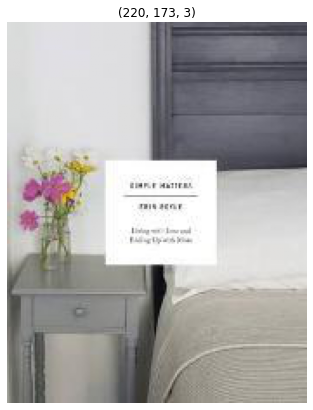

./book-covers/Mind-Body-Spirit/0000153.jpg


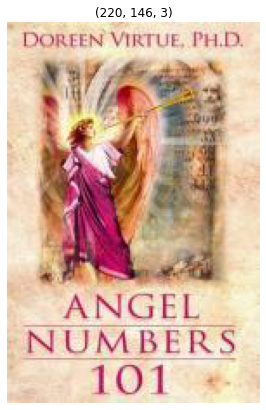

./book-covers/Health/0000059.jpg


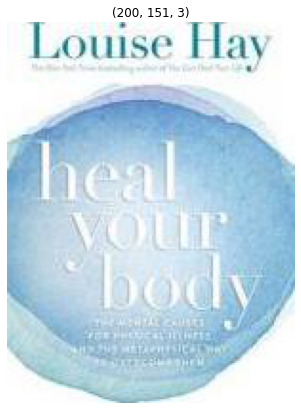

./book-covers/Science-Geography/0000979.jpg


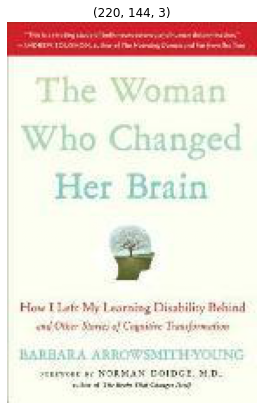

./book-covers/Teaching-Resources-Education/0000694.jpg


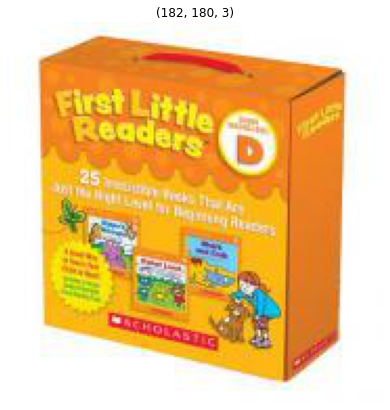

./book-covers/Health/0000065.jpg


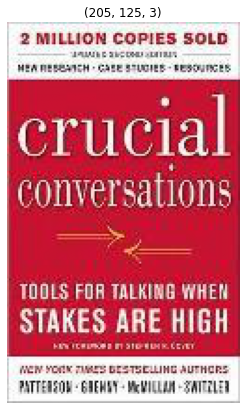

./book-covers/Teaching-Resources-Education/0000737.jpg


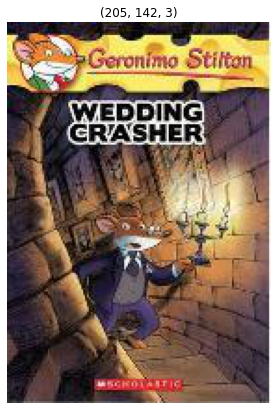

In [6]:
how_many_imgs = 12
for _ in range(how_many_imgs):
  class_name = random.choice(os.listdir('./book-covers'))
  random_img = random.choice(os.listdir(f'./book-covers/{class_name}/'))
  path = f"./book-covers/{class_name}/{random_img}"
  print(path)
  img = mpimg.imread(path)
  img = img / 255.0
  plt.figure(figsize=(10,7))
  plt.imshow(img)
  plt.axis(False)
  plt.title(f'{img.shape}')
  plt.show();

# Load the imgs

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
datagen_small = ImageDataGenerator(rescale=1/255.0,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True,validation_split=0.85)
train_data_small = datagen_small.flow_from_directory('./book-covers/',target_size=(224,224),subset='training')
test_data_small = datagen_small.flow_from_directory('./book-covers/',target_size=(224,224),subset='validation')

Found 4909 images belonging to 33 classes.
Found 27672 images belonging to 33 classes.


# Modelling

In [9]:
import wandb
from wandb.keras import WandbCallback
import tensorflow as tf
import tensorflow_hub as hub
PROJECT_NAME = "Book-Type-Classificiation"

## Transfer Learning (resnet50) vs CNN (Custom) vs Classificiation

### Transfer Learning

In [10]:
# model_url = "https://tfhub.dev/tensorflow/resnet_50/feature_vector/1"
# wandb.init(project=PROJECT_NAME,name='transfer-learning-baseline')
# model = tf.keras.Sequential([
#   hub.KerasLayer(model_url,input_shape=(224,224,3),trainable=False),
#   tf.keras.layers.Dense(len(class_names),activation='softmax')
# ])
# model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
# model.fit(train_data_small,validation_data=(test_data_small),epochs=12,callbacks=[WandbCallback()])

### CNN (Custom) 

In [11]:
# wandb.init(project=PROJECT_NAME,name='CNN-baseline')
# model = tf.keras.Sequential([
#   tf.keras.layers.Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
#   tf.keras.layers.MaxPool2D(),
#   tf.keras.layers.Conv2D(10,3,activation='relu'),
#   tf.keras.layers.MaxPool2D(),
#   tf.keras.layers.Conv2D(10,3,activation='relu'),
#   tf.keras.layers.MaxPool2D(),
#   tf.keras.layers.Conv2D(10,3,activation='relu'),
#   tf.keras.layers.MaxPool2D(),
#   tf.keras.layers.Conv2D(10,3,activation='relu'),
#   tf.keras.layers.MaxPool2D(),
#   tf.keras.layers.Conv2D(10,3,activation='relu'),
#   tf.keras.layers.MaxPool2D(),
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(len(class_names),activation='softmax')
# ])
# model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
# model.fit(train_data_small,validation_data=(test_data_small),epochs=12,callbacks=[WandbCallback()])
# wandb.finish()

### Classifiication

In [12]:
# wandb.init(project=PROJECT_NAME,name='classification-baseline')
# model = tf.keras.Sequential([
#   tf.keras.layers.Flatten(input_shape=(224,224,3)),
#   tf.keras.layers.Dense(5, activation="relu"),
#   tf.keras.layers.Dense(5, activation="relu"),
#   tf.keras.layers.Dense(5, activation="relu"),
#   tf.keras.layers.Dense(5, activation="relu"),
#   tf.keras.layers.Dense(5, activation="relu"),
#   tf.keras.layers.Dense(len(class_names),activation='softmax')
# ])
# model.compile(loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
# model.fit(train_data_small,validation_data=(test_data_small),epochs=12,callbacks=[WandbCallback()])

CNN vs Classifiication vs Transfer Learning

Best `accuracy` = Transfer Learning

Best `loss` = Classifiication

Best `val accuracy` = Transfer Learning

Best `val loss` = Classifiication


# Best Tansfer Learning family

In [13]:
models_to_try = [
    # ['resnet50','https://tfhub.dev/tensorflow/resnet_50/feature_vector/1'],
    # ['resnet_v2_152','https://tfhub.dev/google/imagenet/resnet_v2_152/feature_vector/4'],
    # ['resnet_v1_50','https://tfhub.dev/google/imagenet/resnet_v1_50/feature_vector/4'],
    # ['resnet_v1_101','https://tfhub.dev/google/imagenet/resnet_v1_101/feature_vector/4'],
    # ['inception_v3','https://tfhub.dev/google/imagenet/inception_v3/feature_vector/4'],
    # ['mobilenet_v3_large_100_224','https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5'],
    # ['mobilenet_v3_small_100_224','https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/feature_vector/5'],
    # ['efficentnetb0','https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1'],
]

In [14]:
import wandb

In [15]:
# for model_to_try in models_to_try:
#   print('-'*100)
#   print(model_to_try)
#   print('-'*100)
#   wandb.init(project=PROJECT_NAME,name=f"{model_to_try[0]}-f")
#   model = tf.keras.Sequential([
#     hub.KerasLayer(model_to_try[1],input_shape=(224,224,3),trainable=False),
#     tf.keras.layers.Dense(len(class_names),activation='softmax')
#   ])
#   model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
#   model.fit(train_data_small,validation_data=(test_data_small),epochs=7,callbacks=[WandbCallback(save_model=False)])
#   wandb.finish()

# What is the best Transfer Learning family ? 

efficentnet vs resnet vs mobilevnet vs inceptionnet

Best `accuracy` = mobile_v3_large_100_244

Best `loss` = mobile_v3_large_100_244

Best `val accuracy` = efficnetnetb0

Best `val loss` = efficnetnetb0


In [16]:
datagen_small = ImageDataGenerator(rescale=1/255.0,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True,validation_split=0.25)
train_data = datagen_small.flow_from_directory('./book-covers/',target_size=(224,224),subset='training')
test_data = datagen_small.flow_from_directory('./book-covers/',target_size=(224,224),subset='validation')

Found 24446 images belonging to 33 classes.
Found 8135 images belonging to 33 classes.


In [17]:
# wandb.init(project=PROJECT_NAME,name='mobilenet_v3_large_100_224')
# model = tf.keras.Sequential([
#   hub.KerasLayer('https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5',input_shape=(224,224,3),trainable=False),
#   tf.keras.layers.Dense(len(class_names),activation='softmax')
# ])
# model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
# model.fit(train_data,validation_data=(test_data),epochs=12,callbacks=[WandbCallback()])

In [18]:
# wandb.init(project=PROJECT_NAME,name='efficientnetb0')
# model = tf.keras.Sequential([
#   hub.KerasLayer('https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1',input_shape=(224,224,3),trainable=False),
#   tf.keras.layers.Dense(len(class_names),activation='softmax')
# ])
# model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
# model.fit(train_data,validation_data=(test_data),epochs=12,callbacks=[WandbCallback()])

# efficentnetb0 wins!!
Now I am going to go through all efficentnetb0 - efficetnetb7 models and see what is the best model.

# efficentnet Feature extraction vs efficetnet Classification

In [19]:
# wandb.init(project=PROJECT_NAME,name='efficientnetb0-feature-extraction')
# model = tf.keras.Sequential([
#   hub.KerasLayer('https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1',input_shape=(224,224,3),trainable=False),
#   tf.keras.layers.Dense(len(class_names),activation='softmax')
# ])
# model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
# model.fit(train_data,validation_data=(test_data),epochs=12,callbacks=[WandbCallback()])

In [20]:
# wandb.init(project=PROJECT_NAME,name='efficientnetb0-classifiication')
# model = tf.keras.Sequential([
#   hub.KerasLayer('https://tfhub.dev/tensorflow/efficientnet/b0/classification/1',input_shape=(224,224,3),trainable=False),
#   tf.keras.layers.Dense(len(class_names),activation='softmax')
# ])
# model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
# model.fit(train_data,validation_data=(test_data),epochs=12,callbacks=[WandbCallback()])

# Classifiication vs Feature Extraction (Transfer Learning)

`...` won !!

In [21]:
a = (224,224)
a + (3,)

(224, 224, 3)

In [32]:
models_to_try = [
                 ['efficentnetb0','https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1',(224,224)],
                 ['efficentnetb1','https://tfhub.dev/tensorflow/efficientnet/b1/feature-vector/1',(224,224)],
                 ['efficentnetb2','https://tfhub.dev/tensorflow/efficientnet/b2/feature-vector/1',(224,224)],
                 ['efficentnetb3','https://tfhub.dev/tensorflow/efficientnet/b3/feature-vector/1',(224,224)],
                 ['efficentnetb4','https://tfhub.dev/tensorflow/efficientnet/b4/feature-vector/1',(224,224)],
                 ['efficentnetb5','https://tfhub.dev/tensorflow/efficientnet/b5/feature-vector/1',(224,224)],
                 ['efficentnetb6','https://tfhub.dev/tensorflow/efficientnet/b6/feature-vector/1',(224,224)],
                ##  ['efficentnetb7','https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1',(600,600)],
]

In [ ]:
for model_to_try in models_to_try:
  print(model_to_try)
  datagen_small = ImageDataGenerator(rescale=1/255.0,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True,validation_split=0.75)
  train_data = datagen_small.flow_from_directory('./book-covers/',target_size=model_to_try[2],subset='training')
  test_data = datagen_small.flow_from_directory('./book-covers/',target_size=model_to_try[2],subset='validation')
  wandb.init(project=PROJECT_NAME,name=f'{model_to_try[0]}-classifiication')
  model = tf.keras.Sequential([
    hub.KerasLayer(model_to_try[1],input_shape=model_to_try[2]+(3,),trainable=False),
    tf.keras.layers.Dense(len(class_names),activation='softmax')
  ])
  model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
  model.fit(train_data,validation_data=(test_data),epochs=round(12),callbacks=[WandbCallback()])
  wandb.finish()

['efficentnetb0', 'https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1', (224, 224)]
Found 8161 images belonging to 33 classes.
Found 24420 images belonging to 33 classes.


epoch,9
loss,2.54087
accuracy,0.28651
val_loss,3.00702
val_accuracy,0.19619
_runtime,4032
_timestamp,1618155976
_step,9
best_val_loss,2.97002
best_epoch,1


epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▄▃▃▂▂▁▁▁
accuracy,▁▄▅▆▇▇▇███
val_loss,▃▁▂▃▃▃▃▂▆█
val_accuracy,▁▃▄▂█▃▆▇▇▅
_runtime,▁▂▃▃▄▅▆▆▇█
_timestamp,▁▂▃▃▄▅▆▆▇█
_step,▁▂▃▃▄▅▆▆▇█


Epoch 1/12
256/256 [==============================] - 578s 2s/step - loss: 3.3466 - accuracy: 0.0964 - val_loss: 3.0998 - val_accuracy: 0.1612
Epoch 2/12
256/256 [==============================] - 221s 864ms/step - loss: 2.9034 - accuracy: 0.2059 - val_loss: 3.0490 - val_accuracy: 0.1771
Epoch 3/12
256/256 [==============================] - 218s 855ms/step - loss: 2.7521 - accuracy: 0.2384 - val_loss: 3.0356 - val_accuracy: 0.1767
Epoch 4/12
256/256 [==============================] - 219s 857ms/step - loss: 2.6725 - accuracy: 0.2643 - val_loss: 3.0405 - val_accuracy: 0.1830
Epoch 5/12
256/256 [==============================] - 218s 855ms/step - loss: 2.5777 - accuracy: 0.2931 - val_loss: 3.0475 - val_accuracy: 0.1862
Epoch 6/12
256/256 [==============================] - 218s 855ms/step - loss: 2.5378 - accuracy: 0.3047 - val_loss: 3.0366 - val_accuracy: 0.1874
Epoch 7/12
256/256 [==============================] - 220s 862ms/step - loss: 2.4727 - accuracy: 0.3135 - val_loss: 3.0612 - va

wandb: ERROR Control-C detected -- Run data was not synced


['efficentnetb1', 'https://tfhub.dev/tensorflow/efficientnet/b1/feature-vector/1', (224, 224)]
Found 8161 images belonging to 33 classes.
Found 24420 images belonging to 33 classes.


Epoch 1/12
256/256 [==============================] - 333s 1s/step - loss: 3.3783 - accuracy: 0.0954 - val_loss: 3.0889 - val_accuracy: 0.1664
Epoch 2/12
256/256 [==============================] - 226s 885ms/step - loss: 2.9036 - accuracy: 0.2017 - val_loss: 3.0418 - val_accuracy: 0.1808
Epoch 3/12
256/256 [==============================] - 227s 890ms/step - loss: 2.7417 - accuracy: 0.2492 - val_loss: 3.0472 - val_accuracy: 0.1787
Epoch 4/12
256/256 [==============================] - 225s 882ms/step - loss: 2.6677 - accuracy: 0.2601 - val_loss: 3.0366 - val_accuracy: 0.1826
Epoch 5/12
256/256 [==============================] - 222s 868ms/step - loss: 2.6078 - accuracy: 0.2845 - val_loss: 3.0420 - val_accuracy: 0.1833
Epoch 6/12
256/256 [==============================] - 224s 878ms/step - loss: 2.5548 - accuracy: 0.2937 - val_loss: 3.0475 - val_accuracy: 0.1866
Epoch 7/12
256/256 [==============================] - 224s 877ms/step - loss: 2.4914 - accuracy: 0.3034 - val_loss: 3.0584 - va

epoch,11
loss,2.32736
accuracy,0.34481
val_loss,3.13182
val_accuracy,0.17903
_runtime,2860
_timestamp,1618161934
_step,11
best_val_loss,3.03658
best_epoch,3


epoch,▁▂▂▃▄▄▅▅▆▇▇█
loss,█▆▄▄▃▃▂▂▂▁▁▁
accuracy,▁▃▅▅▆▆▇▇▇███
val_loss,▅▁▂▁▁▂▃▄▄▆▇█
val_accuracy,▁▆▅▇▇█▇▆▆▅▅▅
_runtime,▁▂▂▃▄▄▅▅▆▇▇█
_timestamp,▁▂▂▃▄▄▅▅▆▇▇█
_step,▁▂▂▃▄▄▅▅▆▇▇█


['efficentnetb2', 'https://tfhub.dev/tensorflow/efficientnet/b2/feature-vector/1', (224, 224)]
Found 8161 images belonging to 33 classes.
Found 24420 images belonging to 33 classes.


Epoch 1/12
256/256 [==============================] - 556s 2s/step - loss: 3.3332 - accuracy: 0.1037 - val_loss: 3.0934 - val_accuracy: 0.1656
Epoch 2/12
256/256 [==============================] - 227s 889ms/step - loss: 2.8890 - accuracy: 0.2148 - val_loss: 3.0357 - val_accuracy: 0.1780
Epoch 3/12
256/256 [==============================] - 227s 889ms/step - loss: 2.7671 - accuracy: 0.2414 - val_loss: 3.0419 - val_accuracy: 0.1780
Epoch 4/12
256/256 [==============================] - 225s 879ms/step - loss: 2.6643 - accuracy: 0.2610 - val_loss: 3.0354 - val_accuracy: 0.1862
Epoch 5/12
256/256 [==============================] - 221s 867ms/step - loss: 2.6135 - accuracy: 0.2759 - val_loss: 3.0516 - val_accuracy: 0.1839
Epoch 6/12
256/256 [==============================] - ETA: 0s - loss: 2.5501 - accuracy: 0.2893

In [24]:
datagen_small = ImageDataGenerator(rescale=1/255.0,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True,validation_split=0.85)
train_data_small = datagen_small.flow_from_directory('./book-covers/',target_size=(300,300),subset='training')
test_data_small = datagen_small.flow_from_directory('./book-covers/',target_size=(300,300),subset='validation')

Found 4909 images belonging to 33 classes.
Found 27672 images belonging to 33 classes.


In [25]:
datagen_small = ImageDataGenerator(rescale=1/255.0,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True,validation_split=0.25)
train_data = datagen_small.flow_from_directory('./book-covers/',target_size=(300,300),subset='training')
test_data = datagen_small.flow_from_directory('./book-covers/',target_size=(300,300),subset='validation')

Found 24446 images belonging to 33 classes.
Found 8135 images belonging to 33 classes.


# Best efficentnet model for this project

Best `accuracy` = efficetnetnb5

Best `loss` = efficetnetnb5

Best `val accuracy` = efficetnetnb5

Best `val loss` = efficetnetnb5

efficetnetnb5 won but I cant use it becuase it takes alot of time so I am going with efficetnetnb3

In [26]:
class_names

['Poetry-Drama',
 'Computing',
 'Food-Drink',
 'History-Archaeology',
 'Teen-Young-Adult',
 'Personal-Development',
 'Biography',
 'Childrens-Books',
 'Entertainment',
 'Business-Finance-Law',
 'Natural-History',
 'Medical',
 'Crafts-Hobbies',
 'Sport',
 'Crime-Thriller',
 'Mind-Body-Spirit',
 'Travel-Holiday-Guides',
 'Health',
 'Society-Social-Sciences',
 'Home-Garden',
 'Reference',
 'Science-Geography',
 'Art-Photography',
 'Technology-Engineering',
 'Stationery',
 'Graphic-Novels-Anime-Manga',
 'Humour',
 'Teaching-Resources-Education',
 'Romance',
 'Transport',
 'Science-Fiction-Fantasy-Horror',
 'Dictionaries-Languages',
 'Religion']

In [30]:
wandb.init(project=PROJECT_NAME,name='big-dog-model')
model = tf.keras.Sequential([
  hub.KerasLayer('https://tfhub.dev/tensorflow/efficientnet/b3/feature-vector/1',input_shape=(300,300,3),trainable=False),
  tf.keras.layers.Dense(len(class_names),activation='softmax')
])
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
model.fit(train_data,validation_data=(test_data),epochs=25,callbacks=[WandbCallback(),tf.keras.callbacks.EarlyStopping(patience=5,monitor='val_accuracy')])

Epoch 1/25
764/764 [==============================] - 410s 526ms/step - loss: 3.1905 - accuracy: 0.1365 - val_loss: 2.9809 - val_accuracy: 0.1897
Epoch 2/25
764/764 [==============================] - 405s 529ms/step - loss: 2.8258 - accuracy: 0.2264 - val_loss: 2.9700 - val_accuracy: 0.1926
Epoch 3/25
764/764 [==============================] - 401s 525ms/step - loss: 2.7317 - accuracy: 0.2502 - val_loss: 2.9769 - val_accuracy: 0.1937
Epoch 4/25
764/764 [==============================] - 396s 518ms/step - loss: 2.6959 - accuracy: 0.2526 - val_loss: 2.9811 - val_accuracy: 0.1915
Epoch 5/25
764/764 [==============================] - 393s 515ms/step - loss: 2.6389 - accuracy: 0.2686 - val_loss: 2.9824 - val_accuracy: 0.2010
Epoch 6/25
764/764 [==============================] - 394s 515ms/step - loss: 2.5928 - accuracy: 0.2764 - val_loss: 2.9786 - val_accuracy: 0.1923
Epoch 7/25
764/764 [==============================] - 397s 519ms/step - loss: 2.5686 - accuracy: 0.2830 - val_loss: 2.9828 -

In [31]:
model.save('./model-0.h5')